In [1]:
class ExponentialDist(object):
    def __init__(self,exponentialLambda, randomVarX):
        self.__exponentialLambda = exponentialLambda
        self.__randomVarX = randomVarX
    
    def stepFunction(self,randomVarX):
        return max(0,randomVarX) / randomVarX
    
    def exponentialCDF(self):
        import numpy as np
        u_x = self.stepFunction(self.__randomVarX)
        return (1 - np.exp(-self.__exponentialLambda*self.__randomVarX))*u_x
    
    def exponentialPDF(self):
        import numpy as np
        u_x = self.stepFunction(self.__randomVarX)
        return self.__exponentialLambda*np.exp(-self.__exponentialLambda*self.__randomVarX)*u_x
    
    def makeExponentialPDF(self, dataSampleNumber):
        from scipy.stats import expon
        sample = dataSampleNumber
        start = 1 / self.__exponentialLambda
        variance =  1 / (self.__exponentialLambda**2)
        return expon.rvs(scale=variance, loc=start, size=sample)

In [2]:
import seaborn as sns
import gc

In [3]:
exponentialData = ExponentialDist(2,0.8)

In [4]:
print("CDF: ",exponentialData.exponentialCDF())
print("PDF: ",exponentialData.exponentialPDF())

CDF:  0.7981034820053446
PDF:  0.40379303598931077


17

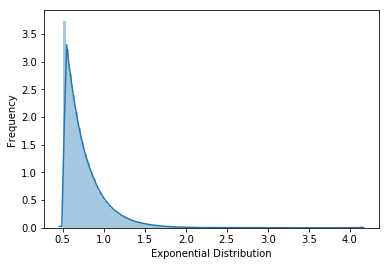

In [5]:
exponentialDataArray = exponentialData.makeExponentialPDF(1000000)
ax = sns.distplot(exponentialDataArray, bins=100)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')
gc.collect()